## Exercise
### Part 1
1. Take a picture of an apple and put it in the image folder in the notebook environment
2. Find the contour of the apple
3. Draw a yellow circle with the center placed on the center of the apple contour
4. Draw a square that precisely holds the apple
5. Take a picture of three seperate apples.
6. Use contours to programmatically identify the number of apples in the photo

### Part 2 (Optional)
1. From [Data](https://unsplash.com/search/photos/jeep) use selenium to download all images of jeeps
2. Use OpenCV to reduce the amount of colors in the images
3. Use OpenCV to find corners [Help](https://docs.opencv.org/master/d8/dd8/tutorial_good_features_to_track.html)
4. (EXTRA) Find all the wheels

## Part 3 (Only if you have extra time)
Follow this tutorial
https://www.mygreatlearning.com/blog/opencv-tutorial-in-python/#sh17

Take any number of exercises, that you can test out and try to apply the techniques on other different images of your own choice. Be aware that using the camera requires you to not use the docker setup. So if you want to play with that you would have to install Anaconda and OpenCV on you own machine.

In [1]:
#BOblikatoriske del er lavet 

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

apple = cv2.imread('apple.jpeg')

apple[:2,:2]


array([[[255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255]]], dtype=uint8)

In [2]:
def read(path, switch_channels=True):
    """Read image pixel data from file
    Args:
    path (string): path to image on disk
    switch_channels (bool): if true changes the channels from bgr to rgb (used by matplotlib)"""
    image = cv2.imread(path)
    if switch_channels:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [5]:
def resize(image, new_x_dim):
    """Reduces the amount of pixels
    Args:
    image (ndarray): the pixel cube
    nex_x_dim (int): new number of columns"""
    ratio = new_x_dim / image.shape[1]
    new_y_dim = int(image.shape[0] * ratio)
    dim = (new_x_dim, new_y_dim)
    resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return resized_image


def create_plot(image, title=''):
    plt.imshow(image, interpolation='none')
    plt.title(title)
    plt.axis('off')
    return plt

(199, 200, 3)


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

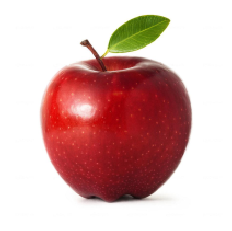

In [6]:
img = read("apple.jpeg")
img_small = resize(img, 200)
print(img_small.shape)
create_plot(img_small)

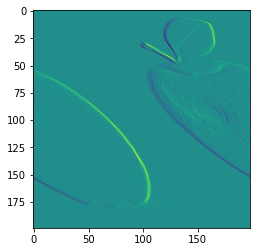

In [7]:
kernel = np.array([[-1, 1],
                   [-1, 1]])
size = kernel.shape[0]
margin = size - 1
apple_grey = cv2.cvtColor(img_small, cv2.COLOR_BGR2GRAY)

#ball_grey[0:2,0:2] * kernel
pixels = []
for row_index, row in enumerate(apple_grey[:-margin]):
    for column_index, pixel in enumerate(row[:-margin]):
        image_part = apple_grey[row_index:row_index + size, column_index:column_index + size]
        pixels.append((kernel * image_part).sum())
        
        
apple_grey.shape
apple_out = np.array(pixels).reshape(199, 198)
plt.imshow(apple_out)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(893, 894, 3)
(893, 894)


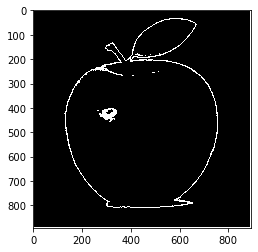

In [8]:

img_loc = 'apple.jpeg'
# 1
img = cv2.imread(img_loc, cv2.IMREAD_UNCHANGED)
print(img.shape)
# 2
img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img_grey.shape)
# 3
thresh = 230 # the lower the threshhold the more details we get
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
# 4
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours
#create an empty image for contours
img_contours = np.zeros(img.shape)
# draw the contours on the empty image
cv2.drawContours(img_contours, contours, -1, (255,255,255), 3)
#save image
cv2.imwrite('data/apple_contours.png',img_contours) 
plt.imshow(img_contours, interpolation='none')

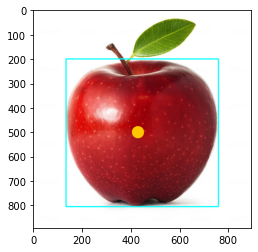

In [9]:
# Opencv uses the bgr format, while matplotlib uses rgb
img = cv2.imread('apple.jpeg')   # Read the image
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

draw_img = img_rgb.copy()        
# Make a copy of the image 
# Draw the line
cv2.rectangle(draw_img,(135,200),(760,805),(0,255,255),3)
cv2.circle(draw_img,(430,500), radius=25, color=(255,200,0), thickness=-1) # negative thickness makes circle filled
font = cv2.FONT_HERSHEY_SIMPLEX 
textcolor = (196,188,180)
#cv2.putText(draw_img,'Apple',(60,130),font, 1,textcolor,2,cv2.LINE_AA)             
plt.imshow(draw_img)    # show the image

In [11]:

img = cv2.imread('apples.png', 1)

# convert the image to HSV color space
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# find Otsu threshold on hue and saturation channel
ret, thresh_H = cv2.threshold(img_hsv[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret, thresh_S = cv2.threshold(img_hsv[:,:,1], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# some morphology operation to clear unwanted spots
kernel = np.ones((5, 5), np.uint8)
thresh = thresh_H + thresh_S
print('Image shape',img_hsv.shape,'Thresh',thresh.shape,np.unique(thresh))
img_dilated = cv2.dilate(thresh, kernel, iterations = 1)

# find contours on the result above
(contours, hierarchy) = cv2.findContours(img_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
im1 = img.copy()
for c in contours:
    cv2.drawContours(im1, contours=[c], contourIdx=-1, color=(0,0,0),thickness=2)
plt.imshow(im1)
plt.figure()

# since there were few small contours found, retain only those above a certain area above 500 pixels
im2 = img.copy()
count = 0
for c in contours:
    if cv2.contourArea(c) > 500:
        count+=1
        cv2.drawContours(im2, [c], -1, (0, 255, 0), 2)

plt.imshow(im2, interpolation='none')
print(f'There are {count} apples')

error: OpenCV(4.5.1) /tmp/pip-req-build-7m_g9lbm/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
